In [4]:
import time

from matplotlib import pyplot as plt

from src.em import em_algorithm
from src.graphs import random_graph
from src.utils import sort_parameters

In [8]:
def benchmark(n, Q, implementations, runs=10, iterations=10):
    X, _, alpha, pi = random_graph(n, Q)
    alpha, pi = sort_parameters(alpha, pi)
    times = []

    for implementation in implementations:
        times.append([])
        for i in range(runs):
            print("Run", i + 1, "with", implementation, "implementation", end="\r")
            start_time = time.time()
            em_algorithm(
                X,
                Q,
                n_init=1,
                iterations=iterations,
                implementation=implementation,
                verbose=False,
            )
            times[-1].append(time.time() - start_time)
    return times

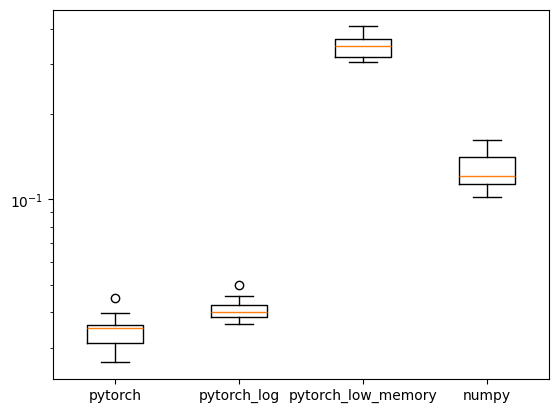

In [9]:
Q = 3
n = 100
times = benchmark(
    n, Q, implementations=["pytorch", "pytorch_log", "pytorch_low_memory", "numpy"]
)

plt.boxplot(times, labels=["pytorch", "pytorch_log", "pytorch_low_memory", "numpy"])
plt.yscale("log")
plt.show()

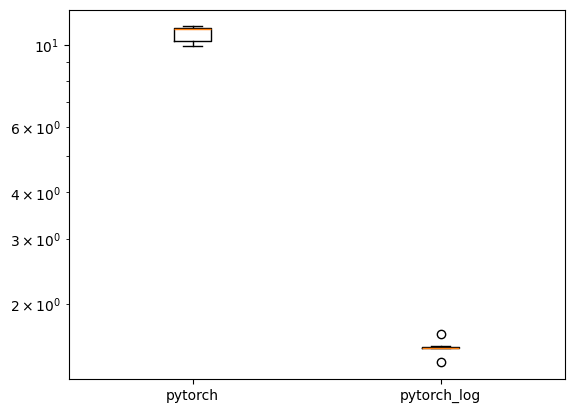

In [6]:
Q = 3
n = 1000
times = benchmark(n, Q, implementations=["pytorch", "pytorch_log"])

plt.boxplot(times, labels=["pytorch", "pytorch_log"])
plt.yscale("log")
plt.show()

When we start having huge graphs, the log version is actually faster so we will use it from now on.